# Generalized Linear Models

Using h2o


# 1)- Importing key libraries 

In [1]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function

In [2]:
# I am an engineer. I care only about error not warning. So, let's be maverick and ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [3]:
# What's life without style :). So, let's add style to our dataframes
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
import pandas as pd
import numpy as np
import h2o
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
import sys
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# first install: pip install version_information
%reload_ext version_information
%version_information pandas, numpy, seaborn, matplotlib, sys,h2o

Software versions
Python 3.6.5 64bit [MSC v.1900 64 bit (AMD64)]
IPython 6.4.0
OS Windows 10 10.0.18362 SP0
pandas 0.24.1
numpy 1.16.0
seaborn 0.9.0
matplotlib 3.0.2
sys The 'sys' distribution was not found and is required by the application
h2o 3.26.0.3
Sun Aug 25 11:17:55 2019 W. Europe Daylight Time

# 2)- Loading data

In [17]:
prostate = h2o.import_file("https://h2o-public-test-data.s3.amazonaws.com/smalldata/prostate/prostate.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [18]:
prostate.head()

ID,CAPSULE,AGE,RACE,DPROS,DCAPS,PSA,VOL,GLEASON
1,0,65,1,2,1,1.4,0,6
2,0,72,1,3,2,6.7,0,7
3,0,70,1,1,2,4.9,0,6
4,0,76,2,2,1,51.2,20,7
5,0,69,1,1,1,12.3,55.9,6
6,1,71,1,3,2,3.3,0,8
7,0,68,2,4,2,31.9,0,7
8,0,61,2,4,2,66.7,27.2,7
9,0,69,1,1,1,3.9,24,7
10,0,68,2,1,2,13,0,6


In [19]:
prostate.shape

(380, 9)

# 3)- Exploring data

# 4)- Initiate h2o

In [6]:
h2o.init()
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.201-b09, mixed mode)
  Starting server from C:\Users\Hassan\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Hassan\AppData\Local\Temp\tmpus68c3qj
  JVM stdout: C:\Users\Hassan\AppData\Local\Temp\tmpus68c3qj\h2o_Hassan_started_from_python.out
  JVM stderr: C:\Users\Hassan\AppData\Local\Temp\tmpus68c3qj\h2o_Hassan_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,03 secs
H2O cluster timezone:,Europe/Berlin
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.3
H2O cluster version age:,1 day
H2O cluster name:,H2O_from_python_Hassan_42vl44
H2O cluster total nodes:,1
H2O cluster free memory:,3.542 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


# 5)- Model building

- **binomial**

### 5.1)- Selecting key features

In [11]:
# converting normal dataframe to H2OFrame
prostate['CAPSULE'] = prostate['CAPSULE'].asfactor()
prostate['RACE'] = prostate['RACE'].asfactor()
prostate['DCAPS'] = prostate['DCAPS'].asfactor()
prostate['DPROS'] = prostate['DPROS'].asfactor()

In [16]:
type(prostate)

h2o.frame.H2OFrame

### 5.2)- Splitting into predictor and response features

In [21]:
predictors = ["AGE", "RACE", "VOL", "GLEASON"]
response_col = "CAPSULE"

### 5.3)- Training model

In [27]:
glm_model = H2OGeneralizedLinearEstimator(family= "binomial", lambda_ = 0, compute_p_values = True)
glm_model.train(predictors, response_col, training_frame= prostate)

glm Model Build progress: |███████████████████████████████████████████████| 100%


### 5.4)- Results

In [30]:
# Coefficients that can be applied to the non-standardized data.
print(glm_model.coef())
{u'GLEASON': 1.2503593867263176, u'VOL': -0.012783348665664449, u'AGE': -0.017888697161812357, u'Intercept': -6.6751553940827195, u'RACE.2': -0.5899232636956354, u'RACE.1': -0.44278751680880707}

# Coefficients fitted on the standardized data (requires standardize = True, which is on by default)
print(glm_model.coef_norm())
{u'GLEASON': 1.365334151581163, u'VOL': -0.2345440232267344, u'AGE': -0.11676080128780757, u'Intercept': -0.07610006436753876, u'RACE.2': -0.5899232636956354, u'RACE.1': -0.44278751680880707}

{'Intercept': -6.921432267968063, 'AGE': -0.018327697689078697, 'RACE': -0.1773130345502415, 'VOL': -0.012730626030644954, 'GLEASON': 1.2525154093877768}
{'Intercept': -0.5294813723463132, 'AGE': -0.11962618901647963, 'RACE': -0.054749523368426985, 'VOL': -0.23357668835572354, 'GLEASON': 1.3676884278016825}


{'GLEASON': 1.365334151581163,
 'VOL': -0.2345440232267344,
 'AGE': -0.11676080128780757,
 'Intercept': -0.07610006436753876,
 'RACE.2': -0.5899232636956354,
 'RACE.1': -0.44278751680880707}

In [29]:
# Print the Coefficients table
glm_model._model_json['output']['coefficients_table']


Coefficients: glm coefficients


,names,coefficients,std_error,z_value,p_value,standardized_coefficients
0,Intercept,-6.921432,1.543218,-4.485065,7.289164e-06,-0.529481
1,AGE,-0.018328,0.018593,-0.985728,3.242665e-01,-0.119626
2,RACE,-0.177313,0.393737,-0.450333,6.524700e-01,-0.054750
3,VOL,-0.012731,0.007512,-1.694752,9.012242e-02,-0.233577
4,GLEASON,1.252515,0.155939,8.032072,9.992007e-16,1.367688


### 5.5)-Quantities of interest

In [32]:
# Print the Standard error
print(glm_model._model_json['output']['coefficients_table']['std_error'])
[1.9317603626604352, 1.3242308316851008, 1.3734657932878116, 0.01870193337051072, 0.007514353657915356, 0.15615627100850296]

[1.5432177547520463, 0.018593054133402443, 0.3937371712318737, 0.007511791464671817, 0.15593926037147512]


[1.9317603626604352,
 1.3242308316851008,
 1.3734657932878116,
 0.01870193337051072,
 0.007514353657915356,
 0.15615627100850296]

In [33]:
# Print the p values
print(glm_model._model_json['output']['coefficients_table']['p_value'])
[0.0005493180609459358, 0.73809783692024, 0.6675489550762566, 0.33881164088847204, 0.0889071809658667, 1.2212453270876722e-15]

[7.289163768020579e-06, 0.32426650987969285, 0.6524699941905834, 0.09012241542798283, 9.992007221626409e-16]


[0.0005493180609459358,
 0.73809783692024,
 0.6675489550762566,
 0.33881164088847204,
 0.0889071809658667,
 1.2212453270876722e-15]

In [34]:
# Print the z values
print(glm_model._model_json['output']['coefficients_table']['z_value'])
[-3.4554779791058787, -0.3343733631736653, -0.42951434726559384, -0.9565159284557886, -1.7011907141473064, 8.007103260414265]

[-4.4850652130296105, -0.9857281949259196, -0.45033349022010677, -1.6947523224676129, 8.032072272268458]


[-3.4554779791058787,
 -0.3343733631736653,
 -0.42951434726559384,
 -0.9565159284557886,
 -1.7011907141473064,
 8.007103260414265]

C:\Users\Hassan\AppData\Roaming\Python\Python36\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\Hassan\AppData\Roaming\Python\Python36\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\Hassan\AppData\Roaming\Python\Python36\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


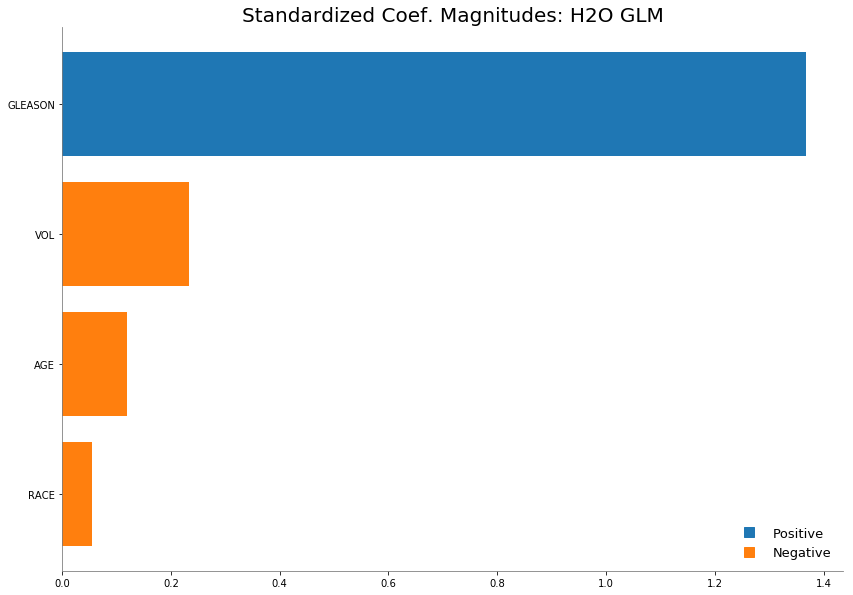

In [35]:
# Retrieve a graphical plot of the standardized coefficient magnitudes
glm_model.std_coef_plot()

# 6)- Multi-nomial Model

In [38]:
from h2o.estimators.glm  import H2OGeneralizedLinearEstimator 
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,28 mins 46 secs
H2O cluster timezone:,Europe/Berlin
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.3
H2O cluster version age:,1 day
H2O cluster name:,H2O_from_python_Hassan_42vl44
H2O cluster total nodes:,1
H2O cluster free memory:,3.531 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"


In [39]:
h2o_df = h2o.import_file("http://h2o-public-test-data.s3.amazonaws.com/smalldata/iris/iris.csv") 

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [40]:
h2o_df.head()

C1,C2,C3,C4,C5
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa


In [41]:
multinomial_fit = H2OGeneralizedLinearEstimator(family = "multinomial")
multinomial_fit.train(y = 4, x = [0,1,2,3], training_frame = h2o_df)

glm Model Build progress: |███████████████████████████████████████████████| 100%


# 7)- Poisson Models

In [44]:
h2o_df = h2o.import_file("http://h2o-public-test-data.s3.amazonaws.com/smalldata/glm_test/Motor_insurance_sweden.txt", sep = '\t') 


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [46]:
h2o_df.head()

Kilometres,Zone,Bonus,Make,Insured,Claims,Payment
1,1,1,1,455.13,108,392491
1,1,1,2,69.17,19,46221
1,1,1,3,72.88,13,15694
1,1,1,4,1292.39,124,422201
1,1,1,5,191.01,40,119373
1,1,1,6,477.66,57,170913
1,1,1,7,105.58,23,56940
1,1,1,8,32.55,14,77487
1,1,1,9,9998.46,1704,6.80599e+06
1,1,2,1,314.58,45,214011


In [48]:
poisson_fit = H2OGeneralizedLinearEstimator(family = " poisson")
poisson_fit.train(y= "Claims" , x = ["Payment", "Insured", "Kilometres", "Zone", "Bonus", "Make"], training_frame = h2o_df)

glm Model Build progress: |███████████████████████████████████████████████| 100%


# 8)- Gamma Models

In [49]:
 h2o_df = h2o.import_file("http://h2o-public-test-data.s3.amazonaws.com/smalldata/prostate/prostate.csv") 

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [50]:
 h2o_df.head()

ID,CAPSULE,AGE,RACE,DPROS,DCAPS,PSA,VOL,GLEASON
1,0,65,1,2,1,1.4,0,6
2,0,72,1,3,2,6.7,0,7
3,0,70,1,1,2,4.9,0,6
4,0,76,2,2,1,51.2,20,7
5,0,69,1,1,1,12.3,55.9,6
6,1,71,1,3,2,3.3,0,8
7,0,68,2,4,2,31.9,0,7
8,0,61,2,4,2,66.7,27.2,7
9,0,69,1,1,1,3.9,24,7
10,0,68,2,1,2,13,0,6


In [53]:
gamma_inverse = H2OGeneralizedLinearEstimator(family = "gamma", link = "inverse") 
gamma_inverse.train(y = "DPROS", x = ["AGE","RACE","CAPSULE","DCAPS","PSA","VOL"], training_frame = h2o_df) 

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [54]:
gamma_log = H2OGeneralizedLinearEstimator(family = " gamma", link = "log") 
gamma_log.train(y="DPROS", x = ["AGE","RACE","CAPSULE" ,"DCAPS","PSA","VOL"], training_frame = h2o_df)

glm Model Build progress: |███████████████████████████████████████████████| 100%
